# Predicting Clinical Trial Terminations
### Notebook 2: Preprocessing & EDA

**Author: Clement Chan**

---
Notes on the notebook:
- The previous notebook consists of the raw dataset and the steps involved in cleaning. We also performed preliminary EDA which highlighted the distribution of important columns and analyzed what potential features we should include in the model.
- In this notebook, we will complete a second round of more in-depth cleaning and exploratory data analysis. Our goal is to make sure the data is prepared for creating a baseline model.
- The data type of each column will be organized according to their relevant information. This makes it easier to create dummy variables for modelling.

### Data Dictionary for this notebook that is based on clinicaltrials.gov:

---

| Column | Description                                  |Data Type|
|-------|--------------------------------------------|-------|
| Study Title | Title of the Clinical Trial           | object |
| Study Status | Binary column, 0 for Completed Trials and 1 for Terminated Trials | int |
| Brief Summary | Short description of the clinical study (Includes study hypothesis) | object |
| Study Results | Whether the results are posted (yes = 1 or no = 0) | int|
| Conditions | Primary Disease or Condition being studied     | object |
| Interventions | The methods used in the trial to reach the outcome                 | object |
| Primary Outcome Measures | Description of specific primary outcome | object |
| Secondary Outcome Measures | Description of specific secondary outcome | object |
| Sponsor | The corporation or agency that initiates the study | object |
| Collaborators | Other organizations that provide support | object |
| Sex | All: No limit on eligibility based on sex, Male: Only male participants, Female: Only female participants | int |
| Age | Age group of participants: ADULT, OLDER_ADULT, CHILD  | int |
| Phases | Clinical trial phase of the study | int |
| Enrollment | Total number of participants in a study | int |
| Funder Type | Government, Industry, or Other | int |
| Study Type | Interventional = 1, Observational = 0 | int |
| Study Design | Study design based on study type | object |
| Start Date | Estimated/Actual date the first participant was enrolled | datetime |
| Primary Completion Date | Date the final participant was examined for the first outcome | datetime |
| Completion Date | Date the final participant was examined | datetime |
| Locations | Where the clinical study will be held | object |

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# ignores the filter warnings
import warnings
warnings.filterwarnings('ignore')

<a id = 'toc'><a/>
## Table of Contents

---
1. [Data Preprocessing](#prep)
   - [a) Study Status](#status)
   - [b) Study Results](#results)
   - [c) Sex](#sex)
   - [d) Age](#age)
   - [e) Phases](#phases)
   - [f) Enrollment](#enrollment)
   - [g) Study Type](#type)
   - [h) Funder Type](#funder)
   - [i) Dates](#date)
   - [j) Locations](#locations)
2. [Exploratory Data Analysis (EDA)](#eda)
3. [Summary & Next Steps](#sum)


<a id = 'prep'></a>
## 1. Data Preprocessing

---
**Load the dataset**

In [3]:
# make sure to not include the index_col
df = pd.read_csv('updated_ctg.csv', index_col = 0)

# First 5 rows of dataset
df.head()

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,...,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
0,Effectiveness of a Problem-solving Interventio...,COMPLETED,We will conduct a two-arm individually randomi...,NO,"Mental Health Issue (E.G., Depression, Psychos...",behavioral: pride 'step 1' problem-solving int...,"Mental health symptoms, The Strengths and Diff...","Mental health symptoms, The adolescent-reporte...",Sangath,Harvard Medical School (HMS and HSDM)|London S...,...,250,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2018-08-20,2019-01-20,2019-02-28,2018-08-14,2019-05-21,"Sangath, New Delhi, Delhi, 110016, India"
1,Oral Ketone Monoester Supplementation and Rest...,RECRUITING,People who report subjective memory complaints...,NO,Cerebrovascular Function|Cognition,other: placebo|dietary_supplement: β-ohb,"Brain network connectivity, Functional connect...","Working memory, Computer battery to assess wor...",McMaster University,"Alzheimer's Society of Brant, Haldimand Norfol...",...,30,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: CRO...,2023-10-25,2024-08,2024-08,2023-08-15,2023-12-01,"McMaster University, Hamilton, Ontario, L8S 4K..."
2,Investigating the Effect of a Prenatal Family ...,COMPLETED,The purpose of this study is to measure the di...,NO,Focus: Contraceptive Counseling|Focus: Postpar...,other: family planning counseling let by commu...,"Self-reported contraceptive use, 6 months post...","Intent to use contraception in the future, 6 m...",Planned Parenthood League of Massachusetts,Society for Family Planning Research Fund,...,176,OTHER,INTERVENTIONAL,Allocation: NON_RANDOMIZED|Intervention Model:...,2013-08,2014-12,2014-12,2013-05-15,2015-08-17,Palestinian Ministry of Health Maternal Child ...
3,Pre-exposure Prophylaxis (PrEP) for People Who...,WITHDRAWN,People who inject drugs (PWID) experience high...,NO,Intravenous Drug Abuse,behavioral: prep uptake/adherence intervention...,"PrEP uptake by self-report, measured using 1 i...",Participant satisfaction with intervention con...,Boston University,National Institute on Drug Abuse (NIDA),...,0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2021-03,2022-03,2022-03,2019-03-11,2021-03-10,unknown
4,Tailored Inhibitory Control Training to Revers...,COMPLETED,Insufficient inhibitory control is one pathway...,NO,Smoking|Alcohol Drinking|Prescription Drug Abu...,behavioral: person-centered inhibitory control...,"Inhibitory control performance, Task 1, Perfor...",Far transfer to a task related to inhibitory c...,University of Oregon,none,...,103,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2014-09,2016-04,2016-05,2016-10-26,2016-10-26,"University of Oregon, Social and Affective Neu..."


Let's find the total number of rows and columns in the data.

In [4]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 482350 rows and 23 columns.


Check the information of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 482350 entries, 0 to 482349
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Study Title                 482350 non-null  object
 1   Study Status                482350 non-null  object
 2   Brief Summary               482350 non-null  object
 3   Study Results               482350 non-null  object
 4   Conditions                  482350 non-null  object
 5   Interventions               482350 non-null  object
 6   Primary Outcome Measures    482350 non-null  object
 7   Secondary Outcome Measures  482350 non-null  object
 8   Sponsor                     482350 non-null  object
 9   Collaborators               482350 non-null  object
 10  Sex                         482350 non-null  object
 11  Age                         482350 non-null  object
 12  Phases                      482350 non-null  object
 13  Enrollment                  482350

<a id = 'status'></a>
### 1. a) Preprocessing - Study Status

---

In the previous notebook, our approach was to drop columns that contain a large amount of missing values, and impute them with the string 'unknown', 'missing', and 'none'. Now, we will target specific columns that seem to have a big impact or significance in determining the `Study Status` variable.

Since the `Study Status` column is our main dependent variable that we are predicting. Let's explore the distribution again, and see if we can minimize the amount of unique values or categories.
- Start by looking at the value counts
- Visualize the distribution of the categories
- Group common categories or remove categories that are insignificant to the model.

In [6]:
df['Study Status'].value_counts()

Study Status
COMPLETED                    263380
RECRUITING                    66150
UNKNOWN                       64828
TERMINATED                    28014
NOT_YET_RECRUITING            20055
ACTIVE_NOT_RECRUITING         19702
WITHDRAWN                     13716
ENROLLING_BY_INVITATION        3931
SUSPENDED                      1646
NO_LONGER_AVAILABLE             446
AVAILABLE                       259
APPROVED_FOR_MARKETING          197
TEMPORARILY_NOT_AVAILABLE        26
Name: count, dtype: int64

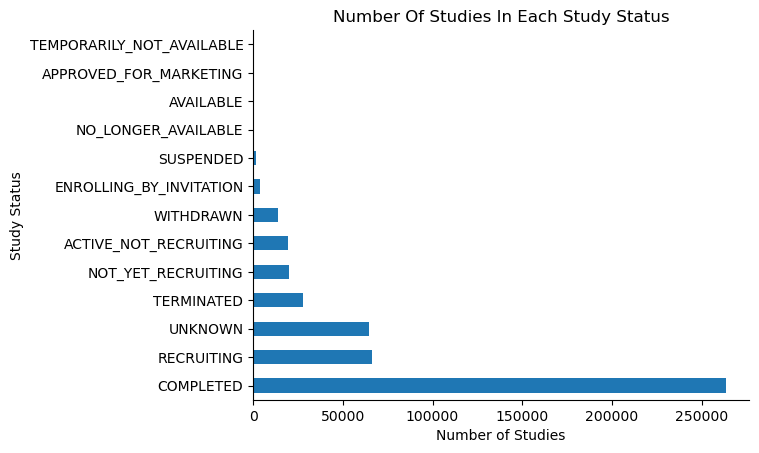

In [7]:
# Visualize counts with a graph
plt.figure()

df['Study Status'].value_counts().plot(kind='barh')

plt.title('Number of Studies in Each study status'.title())
plt.ylabel('Study Status')
plt.xlabel('Number of Studies')

sns.despine()
plt.show()

Most of the studies have been completed, which can cause some data imbalance in other classes such as our targeted 'Terminated' category. Let's continue with the cleaning, and see where we can group common categories together starting with the lowest counts `TEMPORARILY_NOT_AVAILABLE`.

In [8]:
# this option displays all columns in the dataframe
pd.options.display.max_columns = None

In [9]:
# slice out rows where study status is TEMPORARILY_NOT_AVAILABLE
df[df['Study Status'] == 'TEMPORARILY_NOT_AVAILABLE'].head()

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
11239,Thrombosomes for Expanded Access Use,TEMPORARILY_NOT_AVAILABLE,Expanded use of Thrombosomes where a clinical ...,NO,Bleeding,biological: thrombosomes®,unknown,none,"Cellphire Therapeutics, Inc.",none,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2020-11-06,2022-01-28,unknown
47190,"A Phase I Clinical Study of the Safety, Tolera...",TEMPORARILY_NOT_AVAILABLE,This study is designed to multiple dose and do...,NO,Healthy,drug: hx-1171,unknown,none,"Biotoxtech Co., Ltd",none,MALE,ADULT,NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2013-06-28,2013-06-28,"Asan Medical Center, Special City of Seoul, Ko..."
53091,Treating Amyotrophic Lateral Sclerosis (ALS) W...,TEMPORARILY_NOT_AVAILABLE,R(+) pramipexole dihydrochloride monohydrate \...,NO,Amyotrophic Lateral Sclerosis,drug: r(+) pramipexole dihydrochloride monohyd...,unknown,none,"Bennett, James P., Jr., M.D., Ph.D.",University of Pittsburgh|University of Nebraska,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,INDIV,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2008-01-16,2012-07-25,unknown
53366,Development of a Fall Prevention and Fall Dete...,TEMPORARILY_NOT_AVAILABLE,The investigators plan to conduct a first-stag...,NO,Parkinson's Disease,other: portable motion detector,unknown,none,Far Eastern Memorial Hospital,none,ALL,"CHILD, ADULT, OLDER_ADULT",NO PHASE,69,OTHER,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2010-12-20,2010-12-20,unknown
104237,Post-trial Access for Nipocalimab in Participa...,TEMPORARILY_NOT_AVAILABLE,The purpose of this post-trial access (PTA) pr...,NO,Warm Autoimmune Hemolytic Anemia,drug: nipocalimab,unknown,none,"Janssen Research & Development, LLC",none,unknown,"CHILD, ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2022-02-03,2024-01-23,unknown


We can see that the rows where **(Study Status = Temporarily_not_available)** are missing a lot of information in the columns `Outcome_measures`, `Collaborators`, `Study Design`, and some `Locations`. Since this study status is neither completed or terminated, it doesn't provide any meaningful information to the model and we should remove these rows from the dataset.

In [10]:
# drop rows where study status = temp_not_available
df.drop(index = df[df['Study Status'] == 'TEMPORARILY_NOT_AVAILABLE'].index, inplace = True)

In [11]:
# Sanity check
df['Study Status'].value_counts()

Study Status
COMPLETED                  263380
RECRUITING                  66150
UNKNOWN                     64828
TERMINATED                  28014
NOT_YET_RECRUITING          20055
ACTIVE_NOT_RECRUITING       19702
WITHDRAWN                   13716
ENROLLING_BY_INVITATION      3931
SUSPENDED                    1646
NO_LONGER_AVAILABLE           446
AVAILABLE                     259
APPROVED_FOR_MARKETING        197
Name: count, dtype: int64

Next we should look at `APPROVED_FOR_MARKETING` status, and see where we can group those.

In [12]:
df[df['Study Status'] == 'APPROVED_FOR_MARKETING'].head()

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
8036,Expanded Access of Pimavanserin for Patients W...,APPROVED_FOR_MARKETING,The purpose of this program is to provide pati...,NO,Parkinson's Disease Psychosis,drug: pimavanserin tartrate,unknown,none,ACADIA Pharmaceuticals Inc.,none,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2016-05-05,2017-04-18,unknown
8345,18F-FDG PET Imaging in Cardiac Sarcoidosis,APPROVED_FOR_MARKETING,This study has been designed to provide patien...,NO,Cardiac Sarcoidosis,other: 18f-fluorodeoxyglucose (18f-fdg) pet/ct,unknown,none,British Columbia Cancer Agency,none,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,OTHER,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2013-01-09,2022-02-04,"BC Cancer Agency, Vancouver, British Columbia,..."
8886,Early Access Treatment With Daratumumab for (R...,APPROVED_FOR_MARKETING,The objective of this study is to provide earl...,NO,Multiple Myeloma,drug: daratumumab,unknown,none,"Janssen Research & Development, LLC",none,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2015-06-23,2019-01-15,"Phoenix, Arizona, United States|Little Rock, A..."
10306,An Expanded Access Treatment Protocol of Enfor...,APPROVED_FOR_MARKETING,The primary purpose of this expanded access pr...,NO,Locally Advanced or Metastatic Urothelial Carc...,drug: enfortumab vedotin (ev),unknown,none,"Astellas Pharma Global Development, Inc.",Seagen Inc.,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2019-10-23,2020-01-13,"UCLA Hematology Oncology, Los Angeles, Califor..."
11729,An Expanded Access Study to Provide at Home Su...,APPROVED_FOR_MARKETING,"This single arm, multicenter study provides th...",NO,HER2-positive Breast Cancer,drug: pertuzumab and trastuzumab fixed-dose co...,unknown,none,"Genentech, Inc.",none,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2020-05-20,2022-07-05,"Beverly Hills Cancer Center, Beverly Hills, Ca..."


Simiar to the temp_not_available, the category `APPROVED_FOR_MARKETING` is missing a lot of information in the same categories and do not provide much insight into completed or terminated trials. We can drop these rows as well.

In [13]:
# drop rows where study status = APPROVED_FOR_MARKETING
df.drop(index = df[df['Study Status'] == 'APPROVED_FOR_MARKETING'].index, inplace = True)

In [14]:
# Sanity check
df['Study Status'].value_counts()

Study Status
COMPLETED                  263380
RECRUITING                  66150
UNKNOWN                     64828
TERMINATED                  28014
NOT_YET_RECRUITING          20055
ACTIVE_NOT_RECRUITING       19702
WITHDRAWN                   13716
ENROLLING_BY_INVITATION      3931
SUSPENDED                    1646
NO_LONGER_AVAILABLE           446
AVAILABLE                     259
Name: count, dtype: int64

Now, we will look into the `AVAILABLE` category to see where we can group those.

In [15]:
df[df['Study Status'] == 'AVAILABLE'].head()

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
1049,Expanded Access to Ensartinib for Participants...,AVAILABLE,"This is an open-label, multicenter, intermedia...",NO,Non-Small Cell Lung Cancer|ALK Gene Rearrangem...,drug: ensartinib,unknown,none,"Xcovery Holdings, Inc.",none,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2019-10-31,2022-10-20,"Stanford University, Stanford, California, 943..."
2621,Intermediate-size Expanded Access Program (EAP...,AVAILABLE,The objectives of this intermediate-size expan...,NO,Multisystem Inflammatory Syndrome in Children ...,biological: remestemcel-l|drug: hydrocortisone...,unknown,none,Mesoblast International Sàrl,none,ALL,CHILD,NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2020-07-02,2023-05-06,unknown
3931,"Chronic Effect of Mat Pilates on Neuromotor, C...",AVAILABLE,The Pilates method aims to develop conscious c...,NO,Stroke|High Blood Pressure,other: mat pilates,unknown,none,Rio de Janeiro State University,Postgraduate scholarship,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,OTHER,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2024-02-05,2024-02-14,"Jeferson Silva da Rocha, Rio De Janeiro, 20550..."
6425,Chelated Oral Iron Versus Intravenous Iron Suc...,AVAILABLE,compare the efficacy and safety of intravenous...,NO,Iron Deficiency Anemia of Pregnancy,drug: chelated iron|drug: iron sucrose,unknown,none,Assiut University,none,FEMALE,"ADULT, OLDER_ADULT",NO PHASE,69,OTHER,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2021-12-09,2021-12-09,unknown
7385,A Cohort IND Expanded Access Program for Suppo...,AVAILABLE,This Expanded Access Program aims to:\n\n1. Pr...,NO,Uveal Melanoma,drug: tebentafusp,unknown,none,Immunocore Ltd,"Clinigen, Inc.",ALL,"ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2021-07-14,2022-01-21,unknown


These are the studies that are now available. However, this category is missing `Study Design`, some `Collaborators`, and `Outcome_measures`. These studies could still be waiting for more information to be filled in, so for now we will remove these rows as they will not affect our prediction model.

In [16]:
# drop rows where study status = AVAILABLE
df.drop(index = df[df['Study Status'] == 'AVAILABLE'].index, inplace = True)

In [17]:
# Sanity check
df['Study Status'].value_counts()

Study Status
COMPLETED                  263380
RECRUITING                  66150
UNKNOWN                     64828
TERMINATED                  28014
NOT_YET_RECRUITING          20055
ACTIVE_NOT_RECRUITING       19702
WITHDRAWN                   13716
ENROLLING_BY_INVITATION      3931
SUSPENDED                    1646
NO_LONGER_AVAILABLE           446
Name: count, dtype: int64

The `NO_LONGER_AVAILABLE` status has 446 studies, let's see where we can group these.

In [18]:
df[df['Study Status'] == 'NO_LONGER_AVAILABLE'].sample(5)

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
386972,MLN8237 for a Subject With Adenocarcinoma of t...,NO_LONGER_AVAILABLE,To allow a patient continued access to MLN8237,NO,Prostate Cancer,drug: mln8237,unknown,none,The University of Texas Health Science Center ...,none,MALE,"ADULT, OLDER_ADULT",NO PHASE,69,OTHER,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2016-12-29,2018-04-04,unknown
242821,"MAP to Provide Access to Nilotinib, for Patien...",NO_LONGER_AVAILABLE,The purpose of this program is to allow access...,NO,Hypereosinophilic Syndrome (HES),drug: nilotinib,unknown,none,Novartis Pharmaceuticals,none,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2020-08-05,2021-09-20,unknown
372626,Expanded Access Study of Exebacase in COVID-19...,NO_LONGER_AVAILABLE,"This is an open-label, expanded access study o...",NO,MRSA Bloodstream Infection|MRSA Bacteremia|MRS...,drug: exebacase,unknown,none,ContraFect,none,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2020-10-22,2022-08-31,"CF-301-107 Study Site, Butte, Montana, 59701, ..."
348156,Flotetuzumab Expanded Access Program,NO_LONGER_AVAILABLE,The purpose of the Expanded Access program is ...,NO,"Acute Myeloid Leukemia|AML|AML, Adult Recurrent",biological: flotetuzumab,unknown,none,MacroGenics,none,ALL,"CHILD, ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2020-12-22,2022-05-31,unknown
145517,Pegcetacoplan Early Access Program for PNH,NO_LONGER_AVAILABLE,This is an Early Access Program (EAP) which wi...,NO,Paroxysmal Nocturnal Hemoglobinuria (PNH),drug: pegcetacoplan,unknown,none,"Apellis Pharmaceuticals, Inc.",none,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2021-01-28,2021-06-07,"Cancer Specialists of North Florida, Jacksonvi..."


Similarly with the AVAILABLE status, this category is missing information from `outcome_measures`, some `collaborators`, `Phases`, and `Study design`. We can remove these rows as well.

In [19]:
# drop rows where study status = NO_LONGER_AVAILABLE
df.drop(index = df[df['Study Status'] == 'NO_LONGER_AVAILABLE'].index, inplace = True)

In [20]:
# Sanity check
df['Study Status'].value_counts()

Study Status
COMPLETED                  263380
RECRUITING                  66150
UNKNOWN                     64828
TERMINATED                  28014
NOT_YET_RECRUITING          20055
ACTIVE_NOT_RECRUITING       19702
WITHDRAWN                   13716
ENROLLING_BY_INVITATION      3931
SUSPENDED                    1646
Name: count, dtype: int64

The suspended status is when studies are halted for an indefinite amount of time, but can resume when proper conditions are met. Let's see where we can group these statuses.

In [21]:
df[df['Study Status'] == 'SUSPENDED'].sample(5)

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
73010,Normal Saline Versus Heparinized Solution Flus...,SUSPENDED,The aim of the study is to verify if the perio...,NO,Infection of Intravenous Catheter|Phlebitis|Ex...,"drug: 0,9% nacl flush|drug: heparin 50u/ml",Average length of stay on site of the catheter...,Incidence of complications extimated overall a...,University of Florence,none,ALL,CHILD,PHASE4,52,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2013-01,2014-08,2016-08,2013-02-20,2015-10-29,"Meyer Children Hospital, Florence, Tuscany, 50..."
418593,Managing Cancer and Living Meaningfully (CALM)...,SUSPENDED,Background:\n\nPsychological distress affects ...,NO,Depression,behavioral: calm therapy,reduction of depressive symptoms using the PRO...,reduction of depressive symptoms using the PRO...,National Cancer Institute (NCI),none,ALL,"ADULT, OLDER_ADULT",NO PHASE,13,NIH,INTERVENTIONAL,Allocation: NA|Intervention Model: SINGLE_GROU...,2021-08-11,2024-11-01,2024-11-01,2021-04-21,2023-12-11,"National Institutes of Health Clinical Center,..."
231394,Study for Safety and Efficacy Evaluation of Im...,SUSPENDED,The purpose of this study is to evaluate the e...,NO,Acute Lymphoblastic Leukemia (ALL) Philadelphi...,drug: imatinib mesylate,"Evaluate the efficacy, through molecular respo...",Evaluate toxicity and tolerability in the admi...,Renato Melaragno,none,ALL,"CHILD, ADULT",PHASE2,20,OTHER,INTERVENTIONAL,Allocation: NA|Intervention Model: SINGLE_GROU...,unknown,unknown,unknown,2010-10-18,2013-03-26,unknown
354612,P2Y12 Inhibitor Monotherapy Versus Extended DA...,SUSPENDED,This study aimed to compare the efficacy and s...,NO,Coronary Artery Disease|Stents|Atherosclerosis,drug: clopidogrel|drug: ticagrelor|drug: aspirin,"A composite of death, myocardial infarction, a...","All-cause death, Any death, 36 months after th...",Samsung Medical Center,none,ALL,"ADULT, OLDER_ADULT",PHASE4,1520,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2017-04-19,2017-12-18,2023-12-18,2017-04-18,2023-11-27,"Samsung Medical Center, Seoul, 06351, Korea, R..."
209356,Cross Therapy Registry - Oedema - EU (CTR-Oede...,SUSPENDED,The geko™ Cross Therapy Registry - Oedema - EU...,NO,Edema Leg,device: geko neuromuscular electro stimulator ...,"Safety: AEs and SAEs, Safety: determine freque...",Summary of routinely collected performance dat...,Firstkind Ltd,none,ALL,"ADULT, OLDER_ADULT",NO PHASE,2000,INDUSTRY,OBSERVATIONAL,Observational Model: |Time Perspective: p,2021-06-21,2025-02,2025-02,2021-01-11,2023-08-22,"Cliniques Universitaires Saint-Luc, Brussels, ..."


If we look at the `Completion Date` column, we can see that some dates are set in the future (2025, 2028, etc). This means that these studies could potentially startup again when conditions are met. Therefore, we should remove these rows since they are neither completed or terminated.

In [22]:
# drop rows where study status = SUSPENDED
df.drop(index = df[df['Study Status'] == 'SUSPENDED'].index, inplace = True)

In [23]:
# Sanity check
df['Study Status'].value_counts()

Study Status
COMPLETED                  263380
RECRUITING                  66150
UNKNOWN                     64828
TERMINATED                  28014
NOT_YET_RECRUITING          20055
ACTIVE_NOT_RECRUITING       19702
WITHDRAWN                   13716
ENROLLING_BY_INVITATION      3931
Name: count, dtype: int64

Now let's look at `ENROLLING_BY_INVITATION` to see where we can group these statuses with.

In [24]:
df[df['Study Status'] == 'ENROLLING_BY_INVITATION'].sample(5)

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
141138,Ketamine + Cognitive Training for Suicidality ...,ENROLLING_BY_INVITATION,This project seeks to identify the acute and l...,NO,"Suicide, Attempted",drug: intravenous ketamine|behavioral: cogniti...,"Scale for Suicide Ideation, suicidal ideation/...","Adult Suicide Ideation Questionnaire, suicidal...",Rebecca Price,National Institute of Mental Health (NIMH),ALL,"ADULT, OLDER_ADULT",PHASE4,200,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2021-03-15,2026-03-02,2026-03-02,2020-10-08,2023-10-05,"University of Pittsburgh, Pittsburgh, Pennsylv..."
448860,Patient Performance on Virtual Reality Visual ...,ENROLLING_BY_INVITATION,The purpose of this research is to study the e...,NO,Glaucoma,device: virtual reality visual field|diagnosti...,"Sensitivity of VRVF compared to SAP, Sensitivi...","Variability of Mean Deviation, Variability of ...",University of Miami,none,ALL,"CHILD, ADULT, OLDER_ADULT",NO PHASE,400,OTHER,OBSERVATIONAL,Observational Model: |Time Perspective: p,2021-10-30,2024-03-31,2024-03-31,2021-08-06,2023-12-21,"Bascom Palmer Eye Institute, Miami, Florida, 3..."
101450,Coronary Atherectomy System in Patients With C...,ENROLLING_BY_INVITATION,This is a prospective and multicenter clinical...,NO,Calcification of Coronary Artery,device: coronary atherectomy system of shangha...,"FIM phase: Clinical success, Clinical success ...","Device success, Device success is defined as s...","Shanghai MicroPort Rhythm MedTech Co., Ltd.",none,ALL,"ADULT, OLDER_ADULT",NO PHASE,239,INDUSTRY,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2022-07-01,2023-12-10,2024-12-10,2022-07-07,2022-08-05,The Second Affiliated Hospital Zhejiang Univer...
168000,Health System Methods to Improve Nursing Reten...,ENROLLING_BY_INVITATION,This study is a mixed-method exploratory study...,NO,Motivational Factors for Nurse Retention|Nurse...,unknown,Identify a common mechanism or implementation ...,Commonly-identified challenges nurses are faci...,Poudre Valley Health System,none,ALL,"CHILD, ADULT, OLDER_ADULT",NO PHASE,120,OTHER,OBSERVATIONAL,Observational Model: |Time Perspective: p,2022-02-23,2024-12,2024-12,2022-03-07,2022-11-07,"UCHealth - Medical Center of the Rockies, Love..."
415880,Safety and Efficacy of Paclitax Coated Balloon...,ENROLLING_BY_INVITATION,The purpose of this observational study was to...,NO,In-stent Restenosis,device: genoss® dcb,"Targeted lesion failure, A composite of cardia...","Major adverse cardiovascular events, A composi...",Yonsei University,none,ALL,"ADULT, OLDER_ADULT",NO PHASE,260,OTHER,OBSERVATIONAL,Observational Model: |Time Perspective: p,2022-08-31,2026-03-31,2026-03-31,2022-12-19,2022-12-19,"Yongin Severance Hospital, Yongin, Korea, Repu..."


The `ENROLLING_BY_INVITATION` status consists of studies that are currently selecting participants from a predetermine population for the research. Since this status is not within our scope of the problem, we can also remove these rows.

In [25]:
# drop rows where study status = `ENROLLING_BY_INVITATION`
df.drop(index = df[df['Study Status'] == 'ENROLLING_BY_INVITATION'].index, inplace = True)

In [26]:
# Sanity check
df['Study Status'].value_counts()

Study Status
COMPLETED                263380
RECRUITING                66150
UNKNOWN                   64828
TERMINATED                28014
NOT_YET_RECRUITING        20055
ACTIVE_NOT_RECRUITING     19702
WITHDRAWN                 13716
Name: count, dtype: int64

Next we will look at the `WITHDRAWN` status which has 13,716 studies.

In [27]:
df[df['Study Status'] == 'WITHDRAWN'].sample(5)

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
471620,Regional Anesthesia in Hip Arthroscopy,WITHDRAWN,The purpose of this research is to determine d...,NO,Femoroacetabular Impingement,drug: regional anesthesia bupivacaine|drug: re...,Subject log to record number of pain pills tak...,"Record of Pain Medication given in PACU, Recor...",University of Missouri-Columbia,none,ALL,ADULT,NO PHASE,0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2015-10,2017-10,2017-10,2016-02-04,2017-02-10,"University of Missouri Health System, Columbia..."
400497,Comparison of Biomarkers Based on Fine-Needle ...,WITHDRAWN,RATIONALE: Examining biomarkers in fine-needle...,NO,Breast Cancer,other: cytology specimen collection procedure|...,unknown,none,Fox Chase Cancer Center,National Cancer Institute (NCI),FEMALE,"ADULT, OLDER_ADULT",NO PHASE,0,OTHER,INTERVENTIONAL,Allocation: |Intervention Model: |Masking: |Pr...,unknown,2002-09,2002-09,2003-05-26,2013-07-11,unknown
83858,Use of Prokinetics in Early Enteral Feeding in...,WITHDRAWN,Objective of this study are:\n\n1) To determin...,NO,"Feeding Disorder|Nutrition Disorder|Infant,Pre...",drug: metclopramide|drug: erythromycin|drug: p...,Comparison of Prokinetics and PLACEBO IN EARLY...,Comaparison of Prokintics and Placebo in Early...,East Tennessee State University,none,ALL,CHILD,NO PHASE,0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: CRO...,2011-10,2014-02,2015-12,2012-04-03,2022-11-21,"East Tennessee State University, Johnson City,..."
61831,Lymphocytic B-Leukemia (B-CLL) w/Human IL-2 Ge...,WITHDRAWN,"In the laboratory, we will put a special gene ...",NO,CHRONIC LYMPHOCYTIC B-LEUKEMIA,biological: il-2 secreting and hcl4ol-expressi...,Safety of (Treg) cells using interleukin-2 imm...,determine whether MHC-restricted or unrestrict...,Baylor College of Medicine,The Methodist Hospital Research Institute|Cent...,ALL,"ADULT, OLDER_ADULT",PHASE1,0,OTHER,INTERVENTIONAL,Allocation: NA|Intervention Model: SINGLE_GROU...,2005-09,2009-12,2009-12,2005-09-23,2012-05-21,unknown
334333,Effect of Patient Education on Functions in Pa...,WITHDRAWN,The aim of this study is to investigate effect...,NO,Low Back Pain,other: patient education,"Change of functions, Questionnaire, Patients w...","Change of pain, Questionnaire, Patients will b...",Nordsjaellands Hospital,none,ALL,"ADULT, OLDER_ADULT",NO PHASE,0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2016-01,2017-06,2017-12,2015-07-07,2022-09-29,"Nordsjællands Hospital, Hillerød, Region Hoved..."


Withdrawn are finished studies that have stopped prematurely before enrolling it's first participant. Since this status essentially has the same meaning as the terminated status, we will group this in the same category.

In [28]:
# Use np.where() to replace 'WITHDRAWN' with 'TERMINATED'
df['Study Status'] = np.where(df['Study Status'] == 'WITHDRAWN', 'TERMINATED', df['Study Status'])

In [29]:
# Sanity check
df['Study Status'].value_counts()

Study Status
COMPLETED                263380
RECRUITING                66150
UNKNOWN                   64828
TERMINATED                41730
NOT_YET_RECRUITING        20055
ACTIVE_NOT_RECRUITING     19702
Name: count, dtype: int64

`RECRUITING`, `NOT_YET_RECRUITING`, and `ACTIVE_NOT_RECRUITING` are all study statuses that are **on-going** and is not finished yet. So let's remove those rows as well since it's not within the scope of the problem.

In [30]:
# drop rows where study status = RECRUITING, NOT_YET_RECRUITING, and ACTIVE_NOT_RECRUITING
df.drop(index=df[df['Study Status'].isin(['RECRUITING', 'NOT_YET_RECRUITING', 'ACTIVE_NOT_RECRUITING'])].index, inplace=True)

In [31]:
# Sanity check
df['Study Status'].value_counts()

Study Status
COMPLETED     263380
UNKNOWN        64828
TERMINATED     41730
Name: count, dtype: int64

Finally, we should check the `UNKNOWN` status to see if we can group or remove them.

In [32]:
df[df['Study Status'] == 'UNKNOWN'].sample(10)

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
166132,Ai Chi Method for Children With Asthma,UNKNOWN,This study has the aim to assess the effective...,NO,Asthma|Child|Respiratory Disease|Hydrotherapy|...,other: ai chi|other: asthma education,"Change in Lung function (spirometry)., Forced ...","Change in asthma control., Asthma control will...",Universidade Federal do Rio Grande do Norte,none,ALL,CHILD,NO PHASE,42,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2017-12-20,2020-07-20,2020-07-20,2018-01-05,2019-08-12,Universidade Federal do Rio Grande do Norte (U...
102645,Frozen Embryo Transfer With GnRH-antagonist Trial,UNKNOWN,The fertility treatment in vitro fertilisation...,NO,Infertility,drug: cetrorelix acetate,"Live Birth Rate, Livebirth rate per FET treatm...","Cancellation rate, Number of cycles cancelled ...",University of Oxford,"Oxford Fertility Limited, United Kingdom",FEMALE,ADULT,PHASE4,300,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2018-12-13,2021-01,2021-01,2018-12-04,2019-04-25,"Oxford Fertility, Oxford, OX4 2HW, United Kingdom"
318638,Alemtuzumab for ANCA Associated Refractory Vas...,UNKNOWN,"Overview:\n\nThis open label, randomized, mult...",NO,Vasculitis|Microscopic Polyangiitis|Granulomat...,drug: alemtuzumab,Proportion of patients with a vasculitis respo...,"Proportion of patients with treatment failure,...",Cambridge University Hospitals NHS Foundation ...,none,ALL,ADULT,PHASE4,24,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2011-02,2014-03,2014-03,2011-07-29,2011-07-29,"Addenbrooke's Hospital, University of Cambridg..."
188245,CAR T Cells Targeting CD30 Positive Lymphomas ...,UNKNOWN,"Currently, a majority of lymphomas cannot be c...",NO,Lymphomas,genetic: anti-cd30 car t cells,"Number of patients with adverse events., Deter...",Survival time of Anti-CD30 CAR T cells in vivo...,Peking University,University of Florida,ALL,"ADULT, OLDER_ADULT",PHASE1|PHASE2,20,OTHER,INTERVENTIONAL,Allocation: NA|Intervention Model: SINGLE_GROU...,2014-03,2016-10,2017-10,2014-10-24,2014-10-24,"University of Florida, Gainesville, Florida, 3..."
277401,Randomized Crossover Trial for the Evaluation ...,UNKNOWN,"Thyroid disorders, in particular hypothyroidis...",NO,Hypothyroidism,"drug: l-thyroxine (tablet, per os)|drug: l-thy...",Effects on gut inflammation parameter (Calprot...,"Baseline gut microbiota characterization, Qual...",Meyer Children's Hospital IRCCS,none,ALL,"CHILD, ADULT",PHASE4,70,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: CRO...,2016-05,2018-05,2019-05,2016-09-28,2016-09-28,"Meyer Children's Hospital, Florence, Italy"
29969,Effects of rTMS on Brain Alterations in Stroke...,UNKNOWN,"In this study, the investigators aim to evalua...",NO,Stroke,device: rtms|other: physical therapy,"Brain functional changes after rTMS treatment,...",none,Hangzhou Normal University,none,ALL,"ADULT, OLDER_ADULT",NO PHASE,10,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2018-01-01,2020-12-31,2020-12-31,2018-05-18,2019-08-07,Affiliated Hospital of Nanjing University of C...
460239,Clinical Trial of Use of Autologous Bone Marro...,UNKNOWN,The purpose of this study is to evaluate the s...,NO,Osteonecrosis of Jaw,biological: msc construct for osteonecrosis,Rate of serious adverse events related to the ...,"Time to Repair the injury, 24 months from base...",Red de Terapia Celular,Instituto Murciano de Investigación Biosanitar...,ALL,"ADULT, OLDER_ADULT",PHASE1,10,INDUSTRY,INTERVENTIONAL,Allocation: NA|Intervention Model: SINGLE_GROU...,2015-09,2018-12,2018-12,2015-10-02,2017-03-30,"Hospital Clínico Virgen de la Arrixaca, El Pal..."
152944,Cladribine Dose Escalatio

Since we don't know the status of these studies and we cannot classify them based on other columns without a strong bias. We will just drop all the unknown study status for now.

In [33]:
# drop rows where study status = `UNKNOWN`
df.drop(index = df[df['Study Status'] == 'UNKNOWN'].index, inplace = True)

In [34]:
# Sanity check
df['Study Status'].value_counts()

Study Status
COMPLETED     263380
TERMINATED     41730
Name: count, dtype: int64

Great! Now that we have removed all the statuses that aren't related to predicting clinical trial terminations, we can convert the study status into binary values.

Next, we need to reset the index for our dataframe and convert the terminated status into 1 and the completed status into 0.

In [35]:
# reset dataframe index
df.reset_index(drop = True, inplace = True)

In [36]:
# Convert Study Status values into binary
df['Study Status'] = np.where(df['Study Status'] == 'TERMINATED', 1, 0)

In [37]:
# Sanity + distribution of data check
df['Study Status'].value_counts(normalize=True)

Study Status
0    0.86323
1    0.13677
Name: proportion, dtype: float64

**Important Notes:**
Wow there is a massive data imbalance in our dataset where 86.3% are completed and 13.7% are terminated trials. If we did not have a predictive model and guessed whether trials are completed or terminated, 86.3% of the time you would get a completed result. Therefore to analyze our models, we definitely need to look at precision and recall metrics to find out how good the model really is.

To improve our data imbalance, we could perform some upsampling/desampling of the data during modelling to see how that will affect our results.

<a id = 'results'></a>
### 1. b) Preprocessing - Study Results

[back to table of contents](#toc)

---

Next, let's look into the `Study Results` which can be turned into a binary column as well.

In [38]:
df['Study Results'].value_counts(normalize = True)

Study Results
NO     0.799413
YES    0.200587
Name: proportion, dtype: float64

Around 80% of the studies did not post results. I wonder if this would have any affect on clinical trial terminations...

In [39]:
# Convert Study Results into binary
df['Study Results'] = np.where(df['Study Results'] == 'YES', 1, 0)

In [40]:
# Sanity check
df.head()

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
0,Effectiveness of a Problem-solving Interventio...,0,We will conduct a two-arm individually randomi...,0,"Mental Health Issue (E.G., Depression, Psychos...",behavioral: pride 'step 1' problem-solving int...,"Mental health symptoms, The Strengths and Diff...","Mental health symptoms, The adolescent-reporte...",Sangath,Harvard Medical School (HMS and HSDM)|London S...,ALL,"CHILD, ADULT",NO PHASE,250,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2018-08-20,2019-01-20,2019-02-28,2018-08-14,2019-05-21,"Sangath, New Delhi, Delhi, 110016, India"
1,Investigating the Effect of a Prenatal Family ...,0,The purpose of this study is to measure the di...,0,Focus: Contraceptive Counseling|Focus: Postpar...,other: family planning counseling let by commu...,"Self-reported contraceptive use, 6 months post...","Intent to use contraception in the future, 6 m...",Planned Parenthood League of Massachusetts,Society for Family Planning Research Fund,FEMALE,"CHILD, ADULT, OLDER_ADULT",NO PHASE,176,OTHER,INTERVENTIONAL,Allocation: NON_RANDOMIZED|Intervention Model:...,2013-08,2014-12,2014-12,2013-05-15,2015-08-17,Palestinian Ministry of Health Maternal Child ...
2,Pre-exposure Prophylaxis (PrEP) for People Who...,1,People who inject drugs (PWID) experience high...,0,Intravenous Drug Abuse,behavioral: prep uptake/adherence intervention...,"PrEP uptake by self-report, measured using 1 i...",Participant satisfaction with intervention con...,Boston University,National Institute on Drug Abuse (NIDA),ALL,"ADULT, OLDER_ADULT",NO PHASE,0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2021-03,2022-03,2022-03,2019-03-11,2021-03-10,unknown
3,Tailored Inhibitory Control Training to Revers...,0,Insufficient inhibitory control is one pathway...,0,Smoking|Alcohol Drinking|Prescription Drug Abu...,behavioral: person-centered inhibitory control...,"Inhibitory control performance, Task 1, Perfor...",Far transfer to a task related to inhibitory c...,University of Oregon,none,ALL,ADULT,NO PHASE,103,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2014-09,2016-04,2016-05,2016-10-26,2016-10-26,"University of Oregon, Social and Affective Neu..."
4,Neuromodulation of Trauma Memories in PTSD & A...,0,The purpose of this study is to examine the ef...,1,Alcohol Dependence|PTSD,drug: propranolol|drug: placebo,"Retrieval Session Distress Scores (Session 1),...","Proportion of Drinking Days, Proportion of dri...",Medical University of South Carolina,National Institute on Alcohol Abuse and Alcoho...,ALL,"ADULT, OLDER_ADULT",PHASE2,44,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2010-01,2012-08,2012-08,2010-01-25,2016-03-08,"MUSC, Charleston, South Carolina, 294258908, U..."


<a id = 'sex'></a>
### 1. c) Preprocessing - Sex

[back to table of contents](#toc)

---

Next we will look into the `Sex` column and see if we can turn them into dummy variables.

In [41]:
df['Sex'].value_counts()

Sex
ALL        260212
FEMALE      29436
MALE        15105
unknown       357
Name: count, dtype: int64

Interesting to note that there are 357 unknowns. 
- We should be able to group them with 'ALL', because the study would only choose to recruit male or female participants if that was the requirement for their clinical trial.
- Then we can turn this column into dummy variables with pd.get_dummies()

In [42]:
# replacing `unknown` with `ALL`
df['Sex'] = np.where(df['Sex'] == 'unknown', 'ALL', df['Sex'])

In [43]:
# Creating dummy variables with prefix
sex_dummy = pd.get_dummies(df['Sex'], prefix='Sex', dtype=int)
sex_dummy.head()

,Sex_ALL,Sex_FEMALE,Sex_MALE
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


<a id = 'age'></a>
### 1. d) Preprocessing - Age

[back to table of contents](#toc)

---

Now we will move onto the `Age` column and try to break it down further for modelling.

In [44]:
df['Age'].value_counts()

Age
ADULT, OLDER_ADULT           194578
ADULT                         45937
CHILD, ADULT, OLDER_ADULT     28746
CHILD                         19260
CHILD, ADULT                  12144
OLDER_ADULT                    4445
Name: count, dtype: int64

We can notice that one study can have multiple age groups. The most popular age group are studies that have both `ADULT` and `OLDER_ADULT` participants.
- We can use str.get_dummies() to separate the groups and turn them into dummy variables.

In [45]:
# Creating dummy variables with prefix
age_dummy = df['Age'].str.get_dummies(sep=', ').add_prefix('Age_')
age_dummy.head()

,Age_ADULT,Age_CHILD,Age_OLDER_ADULT
0,1,1,0
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


<a id = 'phases'></a>
### 1. e) Preprocessing - Phases

[back to table of contents](#toc)

---

Next we will look at the trial `Phases` and investigate if we can group common values and turn them into dummy variables.

In [46]:
df['Phases'].value_counts()

Phases
NO PHASE         168986
PHASE2            38291
PHASE1            32613
PHASE3            27504
PHASE4            22433
PHASE1|PHASE2      8522
PHASE2|PHASE3      4183
EARLY_PHASE1       2578
Name: count, dtype: int64

**Notes**
- "EARLY_PHASE1" consists of exploratory trials involving very limited human exposure and zero diagnostic or therapeutic intent.
- "PHASE1|PHASE2" or "PHASE2|PHASE3" are studies that are a combination of the 2 phases. We can definitely separate these with dummies.
- "PHASE1" are initial studies that look at side effects, increased/decreased dosages, early effectiveness of drugs.
- "PHASE2" studies aim to determine common short-term side effects, and effectiveness of drugs under a specific environment.
- "PHASE3" are trials conducted after preliminary evidence of effectiveness, and gather additional information of the overall drug performance.
- "PHASE4" are FDA-approved drugs that look into benefits/risks and optimal use cases.
- "NO PHASE" are studies that do not have a phase such as behavioural interventions or studies of devices.

We can also use str.get_dummies() to get this column ready for modelling.

In [47]:
# Creating dummy variables with prefix
phases_dummy = df['Phases'].str.get_dummies().add_prefix('Phases_')
phases_dummy.head()

,Phases_EARLY_PHASE1,Phases_NO PHASE,Phases_PHASE1,Phases_PHASE2,Phases_PHASE3,Phases_PHASE4
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,0,0,1,0,0


<a id = 'enrollment'></a>
### 1. f) Preprocessing - Enrollment

[back to table of contents](#toc)

---

In the first notebook we found that the `Enrollment` column was heavily right skewed. Let's visualize this again and see how we can perform feature engineering.

In [48]:
# .describe() looks at the summary statistics of the column
df['Enrollment'].describe()

count    3.051100e+05
mean     3.941437e+03
std      4.116496e+05
min      0.000000e+00
25%      2.400000e+01
50%      6.000000e+01
75%      1.570000e+02
max      1.888141e+08
Name: Enrollment, dtype: float64

The distribution is insanely right skewed. Enrollment in each study ranges from 0 to 188 million participants while the **mean** being 3941 participants and **median** being 60 participants.

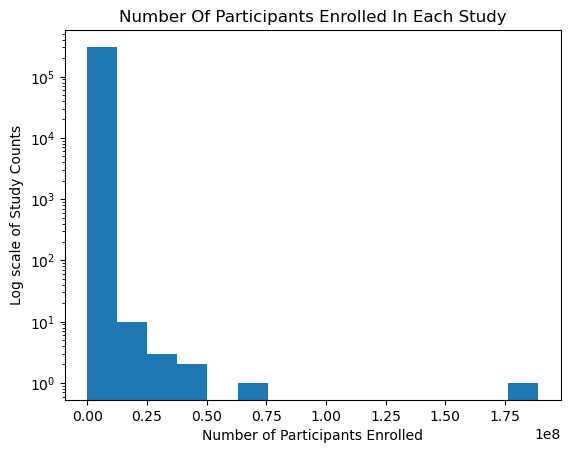

In [49]:
# visualize the distribution
plt.figure()

plt.hist(df['Enrollment'], bins = 15)
plt.yscale('log') # log the y axis to minimize the counts

plt.title('Number of Participants Enrolled in Each Study'.title())
plt.xlabel('Number of Participants Enrolled')
plt.ylabel('Log scale of Study Counts')

plt.show()

Even with a log scale, it is hard to view the average participant enrolled in each study.
- To prepare this column for modelling, we will perform **adaptive binning** which will place the bins according to the distribution of the data.
- We will split the data into deciles where there will be 10% of the data in each bin.

source: (https://mylearningsinaiml.wordpress.com/ml-models/feature-engineering/feature-engineering-numeric-data/)

In [50]:
# Create list that stores deciles
quantile_list = np.arange(0.0, 1.1, 0.1)

# .quantile() splits the distribution equally
quantiles = df['Enrollment'].quantile(quantile_list)
quantiles

0.0            0.0
0.1            9.0
0.2           20.0
0.3           30.0
0.4           42.0
0.5           60.0
0.6           80.0
0.7          120.0
0.8          210.0
0.9          491.0
1.0    188814085.0
Name: Enrollment, dtype: float64

Interesting to note that at the 90th percentile, the number of participants are between 0 and 491, and then the enrollment number jumps enormously.

We can use pd.qcut() to discretize the values into equal sized quantiles.

In [51]:
# impute enrollment values with the new bins
df['Enrollment'] = pd.qcut(df['Enrollment'], q = quantile_list, labels=['0-8','9-19','20-29','30-41','42-59','60-79','80-119','120-209','210-490','491-188814085'])
# sanity check
df['Enrollment'].value_counts()

Enrollment
9-19             35123
42-59            34239
0-8              30899
80-119           30546
491-188814085    30484
210-490          30466
120-209          30311
20-29            29075
30-41            27622
60-79            26345
Name: count, dtype: int64

Nice, this looks pretty evenly distributed. Now to prepare for modelling, we can turn these categories into dummy variables.

In [52]:
# Create dummy variable
enrollment_dummy = pd.get_dummies(df['Enrollment'], prefix= 'Enrollment_', dtype=int)
enrollment_dummy.head()

,Enrollment__0-8,Enrollment__9-19,Enrollment__20-29,Enrollment__30-41,Enrollment__42-59,Enrollment__60-79,Enrollment__80-119,Enrollment__120-209,Enrollment__210-490,Enrollment__491-188814085
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0


<a id = 'type'></a>
### 1. g) Preprocessing - Study Type

[back to table of contents](#toc)

---

Now we will look at the `Study Type` column and see what preprocessing we can perform.

In [53]:
df['Study Type'].value_counts(normalize = True)

Study Type
INTERVENTIONAL    0.796709
OBSERVATIONAL     0.203291
Name: proportion, dtype: float64

Most of the study types in this clinical trial dataset are "INTERVENTIONAL" (79.7%) which are treatments or actions taken to prevent or treat disease. The rest are "OBSERVATIONAL" studies (20.3%) which are therapeutic, diagnostic or other treatments that do not have a specific intervention method.

Since there are only 2 categories in this column, we can just assign binary values.
- Interventional = 1
- Observational = 0

In [54]:
df['Study Type'] = np.where(df['Study Type'] == 'INTERVENTIONAL', 1, 0)

# sanity check
df['Study Type'].value_counts()

Study Type
1    243084
0     62026
Name: count, dtype: int64

<a id = 'funder'></a>
### 1. h) Preprocessing - Funder Type

[back to table of contents](#toc)

---

The `Funder Type` column is next.

In [55]:
df['Funder Type'].value_counts()

Funder Type
OTHER        195419
INDUSTRY      87685
NIH            9185
OTHER_GOV      6113
FED            3245
NETWORK        3031
INDIV           397
UNKNOWN          32
AMBIG             3
Name: count, dtype: int64

- There are 9 unique values in this column with "OTHER" being the largest count.
- We should be able to group "AMBIG" and "UNKNOWN" funder types with "OTHER".
- There seems to be 2 major categories: Industry and Government related funding.

In [56]:
# use .isin to slice out AMBIG and UNKNOWN values to change
df['Funder Type'] = np.where(df['Funder Type'].isin(['AMBIG', 'UNKNOWN']), 'OTHER', df['Funder Type'])

# sanity check
df['Funder Type'].value_counts()

Funder Type
OTHER        195454
INDUSTRY      87685
NIH            9185
OTHER_GOV      6113
FED            3245
NETWORK        3031
INDIV           397
Name: count, dtype: int64

So far so good. Now let's look into a few of these Funder Types to see if we can group them some more.

In [57]:
# Studies funded by individuals
df[df['Funder Type']=='INDIV'].sample(5)

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
155632,Acute and Short-term Effects of Cannabidiol Ad...,0,Despite the current available therapies for op...,1,Opiate Addiction,drug: cannabidiol 400|drug: cannabidiol 800|dr...,Changes in Cue-Induced In-Clinic Craving (From...,"Vital Signs - Blood Pressure, Blood pressure (...","Hurd,Yasmin, Ph.D.",none,ALL,"ADULT, OLDER_ADULT",PHASE2,9-19,INDIV,1,Allocation: RANDOMIZED|Intervention Model: PAR...,2012-05,2013-10,2013-10,2012-05-25,2020-08-11,"Mount Sinai Medical Center, New York, New York..."
180110,Adaptive Device for Insulin Pens for Arthritic...,1,Approximately 34 subjects will be enrolled in ...,0,Diabetes Mellitus|Arthritis,device: pen device,"Visual analog scale for ease of use, Questionn...",none,"Levenson, David I., M.D.",none,ALL,"ADULT, OLDER_ADULT",NO PHASE,0-8,INDIV,1,Allocation: RANDOMIZED|Intervention Model: CRO...,2017-05-01,2018-07-01,2018-07-02,2016-05-20,2019-08-14,"East Coast Medical Associates, Boca Raton, Flo..."
284764,Dry Eye Assessment and Management: Feasibility...,0,The purpose of this study is to test a protoco...,1,Dry Eye Syndromes|Keratoconjunctivitis Sicca,drug: omega-3 efa supplement|drug: olive oil,"Change on Ocular Surface Disease Index (OSDI),...",Change on Brief Ocular Discomfort Inventory (B...,"Asbell, Penny, M.D.",National Eye Institute (NEI),ALL,"ADULT, OLDER_ADULT",PHASE2|PHASE3,20-29,INDIV,1,Allocation: RANDOMIZED|Intervention Model: PAR...,2010-01,2010-07,2011-03,2010-04-13,2012-08-23,"Mount Sinai School of Medicine, New York, New ..."
260585,Pilot Study of Oral 852A for Elimination of Hi...,1,Barrett's esophagus with high-grade dysplasia ...,0,Barrett Esophagus,drug: 852a,Elimination of high-grade dysplasia in Barrett...,none,"Rogers, B.H. Gerald, M.D.",3M,ALL,"ADULT, OLDER_ADULT",NO PHASE,9-19,INDIV,1,Allocation: NON_RANDOMIZED|Intervention Model:...,2006-10,2010-10,2012-10,2006-10-11,2009-01-21,"B. H. Gerald Rogers, M. D., Chicago, Illinois,..."
294426,An Investigator-Initiated Study to Assess the ...,0,"Triamcinolone acetonide is a mid-potency, clas...",0,Acute Steroid Responsive Dermatoses|Chronic St...,drug: triamcinolone acetonide spray|drug: tria...,"Skin Surface Temperature Change, By using an i...",none,"Patel, Rita Vikram, M.D.",Ranbaxy Inc.,ALL,"ADULT, OLDER_ADULT",NO PHASE,20-29,INDIV,1,Allocation: NON_RANDOMIZED|Intervention Model:...,2012-04,2012-05,unknown,2012-11-29,2012-12-04,"Mount Sinai School of Medicine, New York, New ..."


Since the sample size of studies funded by individuals are very low, it is not worth looking into them as a separate category. Therefore, we will group them with "OTHER".

In [58]:
df['Funder Type'] = np.where(df['Funder Type'] == 'INDIV', 'OTHER', df['Funder Type'])

# sanity check
df['Funder Type'].value_counts()

Funder Type
OTHER        195851
INDUSTRY      87685
NIH            9185
OTHER_GOV      6113
FED            3245
NETWORK        3031
Name: count, dtype: int64

In [59]:
# Network is next
df[df['Funder Type']=='NETWORK'].sample(5)

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
291961,Role of Bile Duct Resection in Major Hepatecto...,0,To investigate the prognosis due to presence o...,0,Intrahepatic Cholangiocarcinoma,unknown,"3-year recurrence-free survival rate, 11 years...",none,Kansai Hepatobiliary Oncology Group,none,ALL,"CHILD, ADULT, OLDER_ADULT",NO PHASE,120-209,NETWORK,0,Observational Model: |Time Perspective: p,2013-03,2014-03,2014-03,2013-05-24,2014-07-01,"Osaka University, Graduate School of Medicine,..."
155728,Real-world Effectiveness and Cost-effectivenes...,0,The objective of the study was to compare the ...,0,Asthma,drug: extra-fine hydrofluoroalkane-beclomethas...,"Proxy asthma control, Primary composite measur...","Revised asthma control, A revised definition o...",Research in Real-Life Ltd,"Teva Branded Pharmaceutical Products R&D, Inc.",ALL,"CHILD, ADULT",NO PHASE,491-188814085,NETWORK,0,Observational Model: |Time Perspective: p,2001-01,2007-06,2010-07,2010-06-10,2013-03-14,"General Practice Research Database, London, SW..."
154791,Contrast-enhanced 3D T1-weighted Gradient-echo...,0,Gadolinium-enhanced magnetic resonance imaging...,0,Magnetic Resonance Imaging|Central Nervous Sys...,device: additional mri sequences,"Number of gadolinium-enhanced brain lesions, N...",none,Fondation Ophtalmologique Adolphe de Rothschild,none,ALL,"ADULT, OLDER_ADULT",NO PHASE,120-209,NETWORK,1,Allocation: NA|Intervention Model: SINGLE_GROU...,2017-08-02,2021-04-26,2021-04-26,2017-08-31,2021-09-17,"Fondation Ophtalmologique A. de Rothschild, Pa..."
147115,"CLL-Irl Study. CTRIAL-IE (ICORG) 07-01, V7",0,"RATIONALE: Drugs used in chemotherapy, such as...",0,Leukemia,biological: pegfilgrastim|biological: rituxima...,Complete remission rate by NCI response criter...,"Time to treatment failure (TFF), A clinical as...",Cancer Trials Ireland,none,ALL,"CHILD, ADULT",PHASE2,42-59,NETWORK,1,Allocation: NA|Intervention Model: SINGLE_GROU...,2008-08-18,2019-11-21,2019-11-21,2008-12-22,2023-04-06,"Tallaght University Hospital, Dublin, Leinster..."
227422,A Cluster-Randomized Trial of Ultrasound Use t...,0,"In many low-income countries, the use of ultra...",0,Pregnancy|Eclampsia|Placenta Previa|Stillbirth...,device: antenatal ultrasound scan,"Composite outcome, Introduction of ultrasound ...",Rate of Women with Complicated Deliveries at H...,NICHD Global Network for Women's and Children'...,Bill and Melinda Gates Foundation|GE Healthcare,FEMALE,"CHILD, ADULT",NO PHASE,491-188814085,NETWORK,1,Allocation: RANDOMIZED|Intervention Model: PAR...,2014-04,2016-08,2016-09,2013-11-21,2016-09-29,"Kinshasa School of Public Health, Gemena, Equa..."


These studies seem to be studied by a network of different Industries. We will group these categories with "INDUSTRY".

In [60]:
df['Funder Type'] = np.where(df['Funder Type'] == 'NETWORK', 'INDUSTRY', df['Funder Type'])

# sanity check
df['Funder Type'].value_counts()

Funder Type
OTHER        195851
INDUSTRY      90716
NIH            9185
OTHER_GOV      6113
FED            3245
Name: count, dtype: int64

The categories 'NIH', 'OTHER_GOV', and 'FED' all are government related agencies. We can group them into one single category called "GOVERNMENT".

In [61]:
# use .isin to slice out NIH, OTHER_GOV and FED values to impute
df['Funder Type'] = np.where(df['Funder Type'].isin(['NIH', 'OTHER_GOV', 'FED']), 'GOVERNMENT', df['Funder Type'])

# sanity check
df['Funder Type'].value_counts()

Funder Type
OTHER         195851
INDUSTRY       90716
GOVERNMENT     18543
Name: count, dtype: int64

This looks much more organized and better for our model. Before we turn these categories into dummy variables, let's visualize the distribution because they look very different in counts!

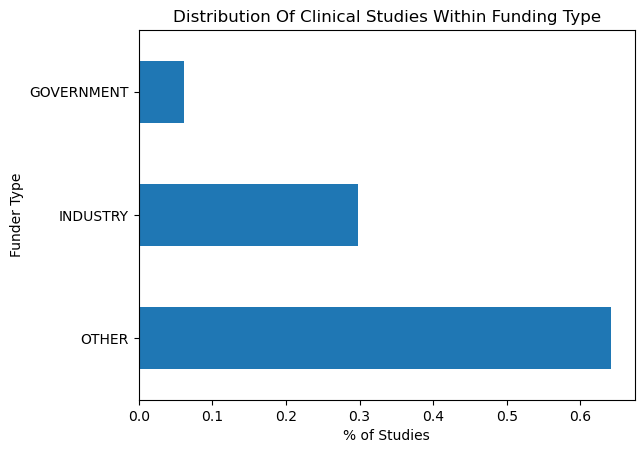

In [62]:
plt.show()

df['Funder Type'].value_counts(normalize = True).plot(kind='barh')
plt.title('Distribution of Clinical Studies within Funding Type'.title())
plt.xlabel('% of Studies')
plt.ylabel('Funder Type')

plt.show()

Most of the studies are in the "OTHER" funding type which are funded by Universities, Individuals, Unknowns, etc. There seems to be much fewer Government funded studies in the dataset, so this would be interesting to note.

Now we will expand the `Funder Type` column into dummy variables.

In [63]:
funder_dummy = pd.get_dummies(df['Funder Type'], prefix='Funder_Type_', dtype=int)
funder_dummy.head()

,Funder_Type__GOVERNMENT,Funder_Type__INDUSTRY,Funder_Type__OTHER
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


<a id = 'date'></a>
### 1. i) Preprocessing - Dates

[back to table of contents](#toc)

---

Next let's clean up the date columns and make sure the data type is 'datetime'.
- We should remove the columns `First Posted` and `Last Update Posted`, because the posting dates do not provide much insight in predicting trial terminations.
- In the previous notebook, we filled in the missing dates with the string 'unknown'. We should've imputed an empty string instead, so we can change the data type.
- Then we should convert the columns `Start Date`, `Primary Completion Date`, and `Completion Date` into datetime.

In [64]:
# drop posted dates
df.drop(columns = ['First Posted', 'Last Update Posted'], inplace = True)

In [65]:
# Change the unknowns of each column in dates into empty strings
dates = ['Start Date', 'Primary Completion Date', 'Completion Date']

for i in dates:
    df[i] = np.where(df[i] == 'unknown', '', df[i])
    # Change the data type into datetime
    df[i] = pd.to_datetime(df[i], format='mixed')
    
# sanity check
df[dates].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305110 entries, 0 to 305109
Data columns (total 3 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Start Date               302231 non-null  datetime64[ns]
 1   Primary Completion Date  289034 non-null  datetime64[ns]
 2   Completion Date          295375 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 7.0 MB


Important to note that there are missing values in these columns now that the data type has been switched into datetime. We also need to check the min and max dates to see if they make sense for each of the columns.

In [66]:
df['Start Date'].describe()

count                           302231
mean     2013-06-10 03:41:32.571575808
min                1900-01-01 00:00:00
25%                2009-05-01 00:00:00
50%                2014-03-01 00:00:00
75%                2018-03-23 00:00:00
max                2097-11-01 00:00:00
Name: Start Date, dtype: object

It doesn't really make sense that a study starts in 2097... Let's look into this row further by selecting start dates after 2050.

In [67]:
df[df['Start Date'] >= '2050-01-01']

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,Locations
77066,Efficacy of Point-Of-Care Creatinine Assays in...,1,Point-of-care (POC) creatinine devices allow r...,0,Renal Insufficiency|Acute Kidney Injury|Contra...,diagnostic_test: serum creatinine assay,Mean difference between eGFR and serum creatin...,"Agreement risk stratification., percentage of ...",Maastricht University Medical Center,none,ALL,"CHILD, ADULT, OLDER_ADULT",NO PHASE,0-8,OTHER,0,Observational Model: |Time Perspective: p,2097-05-01,2099-03-01,2099-03-01,"Maastricht UMC, Maastricht, Netherlands"
99767,"Time to Excretion of Contrast, a Maastricht Pr...",1,Risk of contrast-induced kidney injury is expe...,0,Renal Insufficiency|Acute Kidney Injury|Contra...,diagnostic_test: contrast concentration in urine,"time to contrast-free urine., time to the firs...","% contrast elimination., percentage of total c...",Maastricht University Medical Center,none,ALL,"ADULT, OLDER_ADULT",NO PHASE,0-8,OTHER,0,Observational Model: |Time Perspective: p,2097-11-01,2099-11-01,2099-11-01,"Maastricht UMC, Maastricht, Netherlands"
112967,Study of AQUACEL™ Ag Surgical Cover Dressing F...,1,The aim of the study is to determine whether t...,0,Osteoarthritis,device: aquacel ag dressing,"Incidence of surgical site infections., What i...","Dressing performance., How does the AQUACEL™ A...",Golden Jubilee National Hospital,ConvaTec Inc.,ALL,"CHILD, ADULT, OLDER_ADULT",NO PHASE,0-8,GOVERNMENT,1,Allocation: NA|Intervention Model: SINGLE_GROU...,2050-01-01,2050-01-01,2050-01-01,unknown
180679,Maastricht Investigation of Renal Function in ...,1,Intravascular iodinated contrast administratio...,0,Acute Kidney Injury (Nontraumatic)|Contrast-in...,diagnostic_test: serum creatinine assay,Mean difference in peak change in serum creati...,Mean difference in peak change in serum creati...,Maastricht University Medical Center,none,ALL,"ADULT, OLDER_ADULT",NO PHASE,0-8,OTHER,0,Observational Model: |Time Perspective: p,2097-11-01,2099-11-01,2099-11-01,"Maastricht UMC, Maastricht, Netherlands"
255425,Effects of Cannabidiol on Psychiatric Symptoms...,1,A large proportion of people with a schizophre...,0,Schizophrenia Spectrum Disorders|Cannabis Use,drug: cannabidiol (cbd)|drug: placebo,Change in Brief Psychiatric Rating Scale (BPRS...,"Change in BPRS positive symptoms, The average ...","University of Maryland, Baltimore",Sheppard Pratt Health System|University of Cal...,ALL,ADULT,PHASE2,0-8,OTHER,1,Allocation: RANDOMIZED|Intervention Model: PAR...,2050-01-01,2050-02-01,2050-03-01,Semel Institute for Neuroscience and Human Beh...


These rows were terminated trials that seem to had their dates imputed wrong. We will need to change them to empty strings for now.

In [68]:
# using a mask to select specific row
mask = df['Start Date'] >= pd.Timestamp('2050-01-01')
df.loc[mask, 'Start Date'] = pd.NaT

# sanity check
df['Start Date'].describe()

count                           302226
mean     2013-06-09 18:14:33.502610432
min                1900-01-01 00:00:00
25%                2009-05-01 00:00:00
50%                2014-03-01 00:00:00
75%                2018-03-23 00:00:00
max                2030-12-18 00:00:00
Name: Start Date, dtype: object

It's interesting to see that the first date of any trials started in the 1900s, let's check if these are accurate.

In [69]:
df[df['Start Date'] == '1900-01-01']

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,Locations
168967,"A Study Evaluating the Safety, Pharmacokinetic...",1,"SM04646-IPF-03 is a Phase 2a, multi-center, op...",0,Idiopathic Pulmonary Fibrosis,drug: sm04646,Safety and tolerability: treatment-emergent ad...,Change from baseline of forced vital capacity ...,"Biosplice Therapeutics, Inc.",none,ALL,"ADULT, OLDER_ADULT",PHASE2,0-8,INDUSTRY,1,Allocation: NON_RANDOMIZED|Intervention Model:...,1900-01-01,1900-01-01,1900-01-01,"Research Site, Camperdown, New South Wales, Au..."


Since the start and completion date are the same, it's pretty obvious that these dates are imputed incorrectly. Let's change them into empty values for now.

In [70]:
# using a mask to select specific row
mask = df['Start Date'] == pd.Timestamp('1900-01-01')
df.loc[mask, 'Start Date'] = pd.NaT

# sanity check
df['Start Date'].describe()

count                           302225
mean     2013-06-09 21:31:58.288692224
min                1916-09-05 00:00:00
25%                2009-05-01 00:00:00
50%                2014-03-01 00:00:00
75%                2018-03-23 00:00:00
max                2030-12-18 00:00:00
Name: Start Date, dtype: object

This looks much better. Additionally, we can subtract `Completion Date` with `Start Date` to find the study duration and see how that would affect trial completion.

In [71]:
# creating new column called study_duration
df['study_duration'] = (df['Completion Date'] - df['Start Date']).dt.days # We only want the days
df['study_duration']

0          192.0
1          487.0
2          365.0
3          608.0
4          943.0
           ...  
305105    1423.0
305106     366.0
305107     489.0
305108     566.0
305109      92.0
Name: study_duration, Length: 305110, dtype: float64

Let's explore the summary statistics of this new feature.

In [72]:
df['study_duration'].describe()

count    294427.000000
mean        943.719261
std         962.259624
min           0.000000
25%         306.000000
50%         672.000000
75%        1277.000000
max       38562.000000
Name: study_duration, dtype: float64

- The median study duration is 672 days and the mean is 943 days which indicates a right skew in the distribution.
- The minimum study duration is 0 days and the longest duration is 38,562 days.

In [73]:
df[df['study_duration'] == 38562]

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,Locations,study_duration
6174,Effectiveness of Online Therapy to Prevent Bur...,0,This study aims to address the reliability and...,0,Burnout|Risk Reduction|Cognitive Change,diagnostic_test: efp psychometric assessment t...,To measure the difference between a pre- and p...,none,SciensCollege,Karlstad University|My-E-Health,ALL,"ADULT, OLDER_ADULT",NO PHASE,42-59,INDUSTRY,1,Allocation: NON_RANDOMIZED|Intervention Model:...,1916-09-05,2021-01-11,2022-04-04,"SciensCollege, Malmö, Skåne, 21124, Sweden",38562.0


Wow! This one study started in the year 1916 and finished in 2022. That's an insanely long time.
- Since the range of the study duration is massive and the average duration is only between 672-943 days, we should perform adaptive binning just like we did with the `Enrollment` column.

In [74]:
# Create list that stores deciles
quantile_duration_list = np.arange(0.0, 1.1, 0.1)

# .quantile() splits the distribution equally
quantile_duration = df['study_duration'].quantile(quantile_duration_list)
quantile_duration

0.0        0.0
0.1      123.0
0.2      245.0
0.3      366.0
0.4      516.0
0.5      672.0
0.6      862.0
0.7     1098.0
0.8     1461.0
0.9     2050.0
1.0    38562.0
Name: study_duration, dtype: float64

In [75]:
# creating labels for the duration
duration_label = ['0-122','123-244','245-365','366-515','516-671','672-861','862-1097','1098-1460','1461-2049','2050-38562']

In [76]:
# impute study_duration values with the new bins
df['study_duration'] = pd.qcut(df['study_duration'], q = quantile_duration_list, labels=duration_label)
# sanity check
df['study_duration'].value_counts()

study_duration
1098-1460     30765
245-365       30167
123-244       30064
0-122         29467
2050-38562    29439
862-1097      29425
672-861       29326
516-671       29262
366-515       28418
1461-2049     28094
Name: count, dtype: int64

In [77]:
# Create dummy variable
study_duration_dummy = pd.get_dummies(df['study_duration'], prefix= 'Duration(days)_', dtype=int)
study_duration_dummy.head()

,Duration(days)__0-122,Duration(days)__123-244,Duration(days)__245-365,Duration(days)__366-515,Duration(days)__516-671,Duration(days)__672-861,Duration(days)__862-1097,Duration(days)__1098-1460,Duration(days)__1461-2049,Duration(days)__2050-38562
0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0


**Notes**
- Since we aren't performing a time series analysis and the specific dates on when studies start and end are not useful for us, we will remove the date columns and keep only the duration feature we created.
- We will perform additional EDA to compare duration and `study status` in part 2 of this notebook.

In [78]:
# drop date columns
df.drop(columns=['Start Date', 'Primary Completion Date', 'Completion Date'], inplace=True)

In [79]:
# sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305110 entries, 0 to 305109
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   Study Title                 305110 non-null  object  
 1   Study Status                305110 non-null  int32   
 2   Brief Summary               305110 non-null  object  
 3   Study Results               305110 non-null  int32   
 4   Conditions                  305110 non-null  object  
 5   Interventions               305110 non-null  object  
 6   Primary Outcome Measures    305110 non-null  object  
 7   Secondary Outcome Measures  305110 non-null  object  
 8   Sponsor                     305110 non-null  object  
 9   Collaborators               305110 non-null  object  
 10  Sex                         305110 non-null  object  
 11  Age                         305110 non-null  object  
 12  Phases                      305110 non-null  object  
 13 

- Note that the `study_duration` contains missing values due to missing dates in the start and completed dates of the trials.

We will add the dummy columns when we start modelling. Now we should explore other columns to clean.

<a id = 'locations'></a>
### 1. j) Preprocessing - Locations

[back to table of contents](#toc)

---

From the first notebook, we found out that the `Locations` column had multiple locations listed in each study. Let's see if we can simplify it before we model.

In [80]:
# allows us to view the entire column
pd.set_option('display.max_colwidth', None)

In [81]:
# random sample to view the locations
df['Locations'].sample(10)

97757                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

**Important Notes & Methods**
- The different locations in each study are separated by '|'
- The countries shown are always at the end of each location.
- We need to simplify this column by only extracting the countries listed in each study.

We can use the `pycountry` library to filter out all countries from the Locations column.

In [82]:
import pycountry

# create extract_country function
def extract_country(location):
    """
    Extracts the countries in each clinical study.
    
    Parameters
    -----------
    location: A string input
    
    Returns
    -----------
    ret: A list of unique countries
    
    Examples
    -----------
    extract_country('Ontario, Canada|New York, USA|Alberta, Canada')
    
    returns:
    ['USA', 'Canada']
    
    """
    # create placeholder lists
    holder = []
    countries = []
    
    # split by | to get a list of `sites`
    for sites in location.split('|'):
        
        # split the `sites` by ,
        site = sites.split(',')
        
        # take the last word in the list `site` and remove any whitespaces present
        country_select = site[-1].strip()
        
        # append to holder list
        holder.append(country_select)
        
    # convert holder list into string
    holder = ','.join(holder)
    
    # filters the countries in holder
    for country in pycountry.countries:
        if country.name in holder:
            # append to countries list
            countries.append(country.name)
            
    # return a list of unique countries from our list `countries`
    return list(set(countries))

In [83]:
# the lambda takes each element in Locations and puts into extract_country()
country_df = df['Locations'].apply(lambda x: extract_country(x))

In [84]:
# sanity check
country_df

0                                         [India]
1                                              []
2                                              []
3                                 [United States]
4                                 [United States]
                           ...                   
305105    [United States, South Africa, Thailand]
305106                                         []
305107                              [Switzerland]
305108                            [United States]
305109                                  [Belgium]
Name: Locations, Length: 305110, dtype: object

Great! Now that the countries have been extracted from the `Locations` column, we can use **MultiLabelBinarizer** from sklearn to bin them efficiently into dummy variables so we won't get any duplicated columns.

In [85]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

# split the countries and add Country_ prefix into dummy variables
countries_dummy = pd.DataFrame(mlb.fit_transform(country_df),columns=mlb.classes_, index=df.index).add_prefix('Country_')

In [86]:
# column names fitted by mlb
mlb.classes_

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Ethiopia', 'Faroe Islands', 'Fiji', 'Finland',
       'France', 'French Guiana', 'French Polynesia', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland',
      

The above shows all the countries in the dataset that are extracted from the `Locations` column.

In [87]:
# Show all columns for the dataframe 
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(countries_dummy.sample(5))

,Country_Afghanistan,Country_Albania,Country_Algeria,Country_American Samoa,Country_Andorra,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Aruba,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bermuda,Country_Bhutan,Country_Bosnia and Herzegovina,Country_Botswana,Country_Brazil,Country_Brunei Darussalam,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Cayman Islands,Country_Central African Republic,Country_Chad,Country_Chile,Country_China,Country_Colombia,Country_Comoros,Country_Congo,Country_Costa Rica,Country_Croatia,Country_Cuba,Country_Cyprus,Country_Czechia,Country_Denmark,Country_Djibouti,Country_Dominica,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Equatorial Guinea,Country_Eritrea,Country_Estonia,Country_Ethiopia,Country_Faroe Islands,Country_Fiji,Country_Finland,Country_France,Country_French Guiana,Country_French Polynesia,Country_Gabon,Country_Gambia,Country_Georgia,Country_Germany,Country_Ghana,Country_Gibraltar,Country_Greece,Country_Greenland,Country_Grenada,Country_Guadeloupe,Country_Guam,Country_Guatemala,Country_Guinea,Country_Guinea-Bissau,Country_Guyana,Country_Haiti,Country_Holy See (Vatican City State),Country_Honduras,Country_Hong Kong,Country_Hungary,Country_Iceland,Country_India,Country_Indonesia,Country_Iraq,Country_Ireland,Country_Israel,Country_Italy,Country_Jamaica,Country_Japan,Country_Jordan,Country_Kazakhstan,Country_Kenya,Country_Kiribati,Country_Kuwait,Country_Kyrgyzstan,Country_Lao People's Democratic Republic,Country_Latvia,Country_Lebanon,Country_Lesotho,Country_Liberia,Country_Libya,Country_Liechtenstein,Country_Lithuania,Country_Luxembourg,Country_Madagascar,Country_Malawi,Country_Malaysia,Country_Maldives,Country_Mali,Country_Malta,Country_Martinique,Country_Mauritania,Country_Mauritius,Country_Mayotte,Country_Mexico,Country_Monaco,Country_Mongolia,Country_Montenegro,Country_Montserrat,Country_Morocco,Country_Mozambique,Country_Myanmar,Country_Namibia,Country_Nepal,Country_Netherlands,Country_New Caledonia,Country_New Zealand,Country_Nicaragua,Country_Niger,Country_Nigeria,Country_North Macedonia,Country_Northern Mariana Islands,Country_Norway,Country_Oman,Country_Pakistan,Country_Panama,Country_Papua New Guinea,Country_Paraguay,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Puerto Rico,Country_Qatar,Country_Romania,Country_Russian Federation,Country_Rwanda,Country_Réunion,Country_Saint Kitts and Nevis,Country_Saint Lucia,Country_Saint Vincent and the Grenadines,Country_Samoa,Country_San Marino,Country_Saudi Arabia,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Sierra Leone,Country_Singapore,Country_Slovakia,Country_Slovenia,Country_Solomon Islands,Country_Somalia,Country_South Africa,Country_South Sudan,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Sweden,Country_Switzerland,Country_Syrian Arab Republic,Country_Tajikistan,Country_Thailand,Country_Togo,Country_Trinidad and Tobago,Country_Tunisia,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Yemen,Country_Zambia,Country_Zimbabwe
138709,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [88]:
# make sure rows match with original dataframe
print(f'There are {countries_dummy.shape[0]} rows and {countries_dummy.shape[1]} countries in the clinical trial dataset.')

There are 305110 rows and 190 countries in the clinical trial dataset.


In [89]:
# final check
pd.set_option('display.max_colwidth', 50)
df.head()

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Locations,study_duration
0,Effectiveness of a Problem-solving Interventio...,0,We will conduct a two-arm individually randomi...,0,"Mental Health Issue (E.G., Depression, Psychos...",behavioral: pride 'step 1' problem-solving int...,"Mental health symptoms, The Strengths and Diff...","Mental health symptoms, The adolescent-reporte...",Sangath,Harvard Medical School (HMS and HSDM)|London S...,ALL,"CHILD, ADULT",NO PHASE,210-490,OTHER,1,Allocation: RANDOMIZED|Intervention Model: PAR...,"Sangath, New Delhi, Delhi, 110016, India",123-244
1,Investigating the Effect of a Prenatal Family ...,0,The purpose of this study is to measure the di...,0,Focus: Contraceptive Counseling|Focus: Postpar...,other: family planning counseling let by commu...,"Self-reported contraceptive use, 6 months post...","Intent to use contraception in the future, 6 m...",Planned Parenthood League of Massachusetts,Society for Family Planning Research Fund,FEMALE,"CHILD, ADULT, OLDER_ADULT",NO PHASE,120-209,OTHER,1,Allocation: NON_RANDOMIZED|Intervention Model:...,Palestinian Ministry of Health Maternal Child ...,366-515
2,Pre-exposure Prophylaxis (PrEP) for People Who...,1,People who inject drugs (PWID) experience high...,0,Intravenous Drug Abuse,behavioral: prep uptake/adherence intervention...,"PrEP uptake by self-report, measured using 1 i...",Participant satisfaction with intervention con...,Boston University,National Institute on Drug Abuse (NIDA),ALL,"ADULT, OLDER_ADULT",NO PHASE,0-8,OTHER,1,Allocation: RANDOMIZED|Intervention Model: PAR...,unknown,245-365
3,Tailored Inhibitory Control Training to Revers...,0,Insufficient inhibitory control is one pathway...,0,Smoking|Alcohol Drinking|Prescription Drug Abu...,behavioral: person-centered inhibitory control...,"Inhibitory control performance, Task 1, Perfor...",Far transfer to a task related to inhibitory c...,University of Oregon,none,ALL,ADULT,NO PHASE,80-119,OTHER,1,Allocation: RANDOMIZED|Intervention Model: PAR...,"University of Oregon, Social and Affective Neu...",516-671
4,Neuromodulation of Trauma Memories in PTSD & A...,0,The purpose of this study is to examine the ef...,1,Alcohol Dependence|PTSD,drug: propranolol|drug: placebo,"Retrieval Session Distress Scores (Session 1),...","Proportion of Drinking Days, Proportion of dri...",Medical University of South Carolina,National Institute on Alcohol Abuse and Alcoho...,ALL,"ADULT, OLDER_ADULT",PHASE2,42-59,OTHER,1,Allocation: RANDOMIZED|Intervention Model: PAR...,"MUSC, Charleston, South Carolina, 294258908, U...",862-1097


This looks good! The rest of the columns will be cleaned using CountVectorizer() from sklearn. 


**Now we will export 2 different csv files to stay organized:**
1. A cleaned dataframe called clean_ctg.csv
2. A dataframe that consists of all the dummy variables used for baseline modelling

In [90]:
# export clean_ctg.csv
df.to_csv('clean_ctg.csv')

In [91]:
# slice out columns used for baseline modelling
model_df = df[['Study Status','Study Results','Sex','Age','Phases','Enrollment','Funder Type','Study Type','Locations','study_duration']]
model_df.head()

,Study Status,Study Results,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Locations,study_duration
0,0,0,ALL,"CHILD, ADULT",NO PHASE,210-490,OTHER,1,"Sangath, New Delhi, Delhi, 110016, India",123-244
1,0,0,FEMALE,"CHILD, ADULT, OLDER_ADULT",NO PHASE,120-209,OTHER,1,Palestinian Ministry of Health Maternal Child ...,366-515
2,1,0,ALL,"ADULT, OLDER_ADULT",NO PHASE,0-8,OTHER,1,unknown,245-365
3,0,0,ALL,ADULT,NO PHASE,80-119,OTHER,1,"University of Oregon, Social and Affective Neu...",516-671
4,0,1,ALL,"ADULT, OLDER_ADULT",PHASE2,42-59,OTHER,1,"MUSC, Charleston, South Carolina, 294258908, U...",862-1097


In [92]:
# Concatenate dummy variables to model_df and drop corresponding columns
model_df = pd.concat([model_df, sex_dummy, age_dummy, phases_dummy, enrollment_dummy, funder_dummy, countries_dummy, study_duration_dummy], axis = 1)
model_df.drop(columns = ['Sex','Age','Phases','Enrollment','Funder Type','Locations','study_duration'], inplace = True)
model_df.head()

,Study Status,Study Results,Study Type,Sex_ALL,Sex_FEMALE,Sex_MALE,Age_ADULT,Age_CHILD,Age_OLDER_ADULT,Phases_EARLY_PHASE1,Phases_NO PHASE,Phases_PHASE1,Phases_PHASE2,Phases_PHASE3,Phases_PHASE4,Enrollment__0-8,Enrollment__9-19,Enrollment__20-29,Enrollment__30-41,Enrollment__42-59,Enrollment__60-79,Enrollment__80-119,Enrollment__120-209,Enrollment__210-490,Enrollment__491-188814085,Funder_Type__GOVERNMENT,Funder_Type__INDUSTRY,Funder_Type__OTHER,Country_Afghanistan,Country_Albania,Country_Algeria,Country_American Samoa,Country_Andorra,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Aruba,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bermuda,Country_Bhutan,Country_Bosnia and Herzegovina,Country_Botswana,Country_Brazil,Country_Brunei Darussalam,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Cayman Islands,Country_Central African Republic,Country_Chad,Country_Chile,Country_China,Country_Colombia,Country_Comoros,Country_Congo,Country_Costa Rica,Country_Croatia,Country_Cuba,Country_Cyprus,Country_Czechia,Country_Denmark,Country_Djibouti,Country_Dominica,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Equatorial Guinea,Country_Eritrea,Country_Estonia,Country_Ethiopia,Country_Faroe Islands,Country_Fiji,Country_Finland,Country_France,Country_French Guiana,Country_French Polynesia,Country_Gabon,Country_Gambia,Country_Georgia,Country_Germany,Country_Ghana,Country_Gibraltar,Country_Greece,Country_Greenland,Country_Grenada,Country_Guadeloupe,Country_Guam,Country_Guatemala,Country_Guinea,Country_Guinea-Bissau,Country_Guyana,Country_Haiti,Country_Holy See (Vatican City State),Country_Honduras,Country_Hong Kong,Country_Hungary,Country_Iceland,Country_India,Country_Indonesia,Country_Iraq,Country_Ireland,Country_Israel,Country_Italy,Country_Jamaica,Country_Japan,Country_Jordan,Country_Kazakhstan,Country_Kenya,Country_Kiribati,Country_Kuwait,Country_Kyrgyzstan,Country_Lao People's Democratic Republic,Country_Latvia,Country_Lebanon,Country_Lesotho,Country_Liberia,Country_Libya,Country_Liechtenstein,Country_Lithuania,Country_Luxembourg,Country_Madagascar,Country_Malawi,Country_Malaysia,Country_Maldives,Country_Mali,Country_Malta,Country_Martinique,Country_Mauritania,Country_Mauritius,Country_Mayotte,Country_Mexico,Country_Monaco,Country_Mongolia,Country_Montenegro,Country_Montserrat,Country_Morocco,Country_Mozambique,Country_Myanmar,Country_Namibia,Country_Nepal,Country_Netherlands,Country_New Caledonia,Country_New Zealand,Country_Nicaragua,Country_Niger,Country_Nigeria,Country_North Macedonia,Country_Northern Mariana Islands,Country_Norway,Country_Oman,Country_Pakistan,Country_Panama,Country_Papua New Guinea,Country_Paraguay,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Puerto Rico,Country_Qatar,Country_Romania,Country_Russian Federation,Country_Rwanda,Country_Réunion,Country_Saint Kitts and Nevis,Country_Saint Lucia,Country_Saint Vincent and the Grenadines,Country_Samoa,Country_San Marino,Country_Saudi Arabia,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Sierra Leone,Country_Singapore,Country_Slovakia,Country_Slovenia,Country_Solomon Islands,Country_Somalia,Country_South Africa,Country_South Sudan,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Sweden,Country_Switzerland,Country_Syrian Arab Republic,Country_Tajikistan,Country_Thailand,Country_Togo,Country_Trinidad and Tobago,Country_Tunisia,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Yemen,Country_Zambia,Country_Zimbabwe,Duration(days)__0-122,Duration(days)__123-244,Duration(days)__245-365,Duration(days)__366-515,Duration(days)__516-671,Duration(days)__67

In [93]:
# print number of rows and columns
print(f'There are now {model_df.shape[0]} rows and {model_df.shape[1]} columns in the model dataframe.')

There are now 305110 rows and 228 columns in the model dataframe.


In [94]:
# export model_ctg.csv
model_df.to_csv('model_ctg.csv')


<a id = 'eda'></a>
## 2. Exploratory Data Analysis (EDA)

[back to table of contents](#toc)

---

In the first notebook we conducted preliminary EDA and mainly looked at the distributions of important columns, but now we will dive much deeper to find additional information from the dataset.

We will start by looking at the dependent variable `Study Status` and find out the proportion of terminated trials.

In [95]:
df['Study Status'].value_counts(normalize=True)

Study Status
0    0.86323
1    0.13677
Name: proportion, dtype: float64

- Remember that in `Study Status`, 1 indicates a terminated trial and 0 indicates a completed trial
- 13.7% of the dataset are terminated and 86.3% are completed

Let's visualize this on a graph:

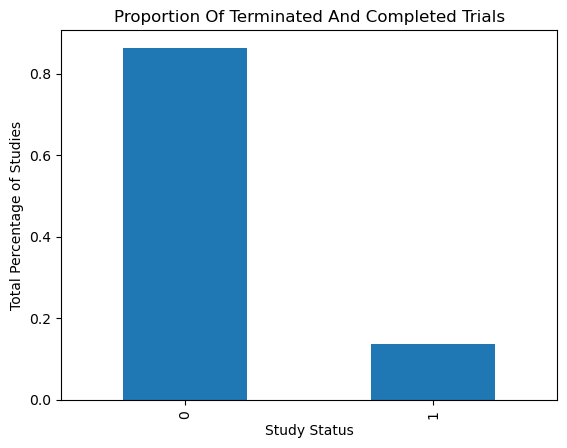

In [96]:
plt.figure

df['Study Status'].value_counts(normalize=True).plot(kind='bar')
plt.title('Proportion of Terminated and Completed Trials'.title())
plt.xlabel('Study Status')
plt.ylabel('Total Percentage of Studies')

plt.show()

Since there are a lot more completed trials than terminated ones, this will cause the predictions to skew towards completed trials due to the class imbalance. We will need to address this during modelling and pay closer attention to precision and recall scores.

Let's explore the `study_duration` variable and analyze how that would affect the `Study Status`.
- The `study_duration` is broken into categorical bins which holds a specific range of days based on adaptive binning

Steps for this analysis:
1. Group `study_duration` together and sum up the `Study Status` to find number of terminated trials in each bin
2. Plot the results with a bar graph.

In [97]:
df.groupby('study_duration')['Study Status'].sum()

study_duration
0-122         3086
123-244       3074
245-365       4075
366-515       3816
516-671       4268
672-861       4775
862-1097      4598
1098-1460     4557
1461-2049     3869
2050-38562    3450
Name: Study Status, dtype: int32

This displays the number of terminated trials in each study duration bin.

Let's visualize this!

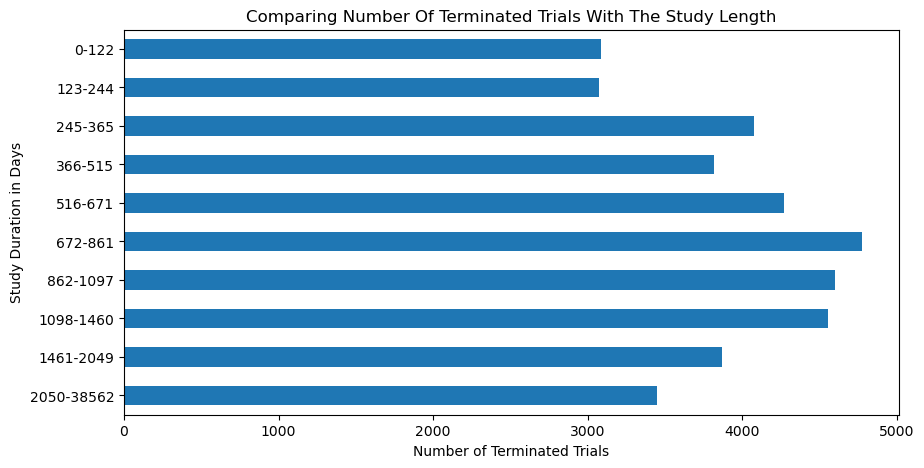

In [98]:
plt.figure(figsize=(10,5))

df.groupby('study_duration')['Study Status'].sum().sort_index(ascending=False).plot(kind='barh')
plt.xlabel('Number of Terminated Trials')
plt.ylabel('Study Duration in Days')
plt.title('Comparing Number of Terminated Trials with the study length'.title())

plt.show()

Interesting to note that studies that last 123-244 days have the least amount of terminated trials and 672-861 days have the most terminated trials. There doesn't seem to be a pattern here, but we should view the percentage of terminated trials in each duration category. We can do this by using the .mean() function instead of .sum() because `Study Status` is a binary column.

In [99]:
df.groupby('study_duration')['Study Status'].mean().sort_index()*100

study_duration
0-122         10.472732
123-244       10.224854
245-365       13.508138
366-515       13.428109
516-671       14.585469
672-861       16.282480
862-1097      15.626168
1098-1460     14.812287
1461-2049     13.771624
2050-38562    11.719148
Name: Study Status, dtype: float64

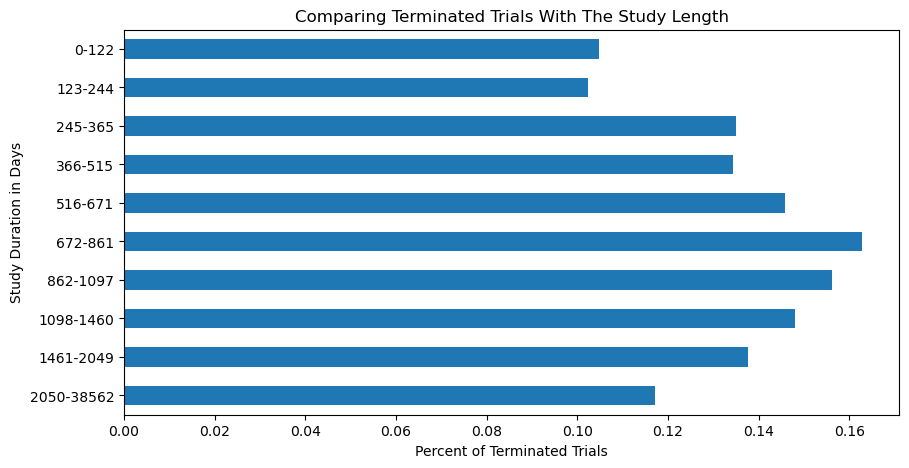

In [100]:
plt.figure(figsize=(10,5))

df.groupby('study_duration')['Study Status'].mean().sort_index(ascending=False).plot(kind='barh')
plt.xlabel('Percent of Terminated Trials')
plt.ylabel('Study Duration in Days')
plt.title('Comparing Terminated Trials with the study length'.title())

plt.show()

In [106]:
df.groupby('study_duration')['Study Status'].mean().sort_index(ascending=True).to_clipboard()

Interesting to see that the terminated trial percentage increases in the middle duration length and then decreases as the study gets longer. Additionally, around 16.3% of studies that last 672-861 days have been terminated, but it's still pretty low compared to 83.7% completed trials in that duration category.

We can perform a similar EDA on the `Enrollment` column when compared to the `Study Status`.

In [101]:
df.groupby('Enrollment')['Study Status'].sum()

Enrollment
0-8              21966
9-19              5314
20-29             2756
30-41             2072
42-59             2102
60-79             1546
80-119            1617
120-209           1643
210-490           1542
491-188814085     1172
Name: Study Status, dtype: int32

When a study has very low participants (0-8), it had the most clinical trial terminations at 21,966. Let's visualize this in percentages with a bar chart.

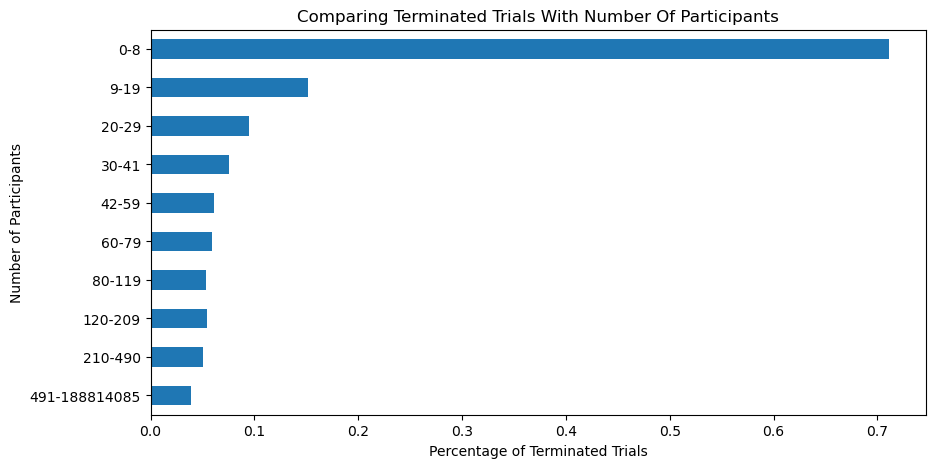

In [102]:
plt.figure(figsize=(10,5))

df.groupby('Enrollment')['Study Status'].mean().sort_index(ascending=False).plot(kind='barh')
plt.xlabel('Percentage of Terminated Trials')
plt.ylabel('Number of Participants')
plt.title('Comparing Terminated Trials with number of participants'.title())

plt.show()

In [105]:
df.groupby('Enrollment')['Study Status'].mean().sort_index(ascending=True).to_clipboard()

Around 70% of trials are terminated if the participants enrolled are very low (0-8). This could be due to a few reasons:
- Not enough people interested in the study
- Not enough funding to recruit people
- Not enough people meet the specific requirements of the study.
- Government/Industries would provide more funding if there are more participants enrolled

There is definitely a pattern that the more participants enrolled in a study the lower the percentage of terminated trials.

<a id = 'sum'></a>
## 3. Summary & Next Steps

[back to table of contents](#toc)

---

**Data Preprocessing**
- We cleaned the tabular columns, changed their data type, and prepared it for modelling.
- Simplified columns to increase interpretability and model efficiency.
- Took out the date columns and added a study duration instead which will allow us to compare study length with trial terminations.

**EDA**
- Didn't find any significant pattern when comparing study duration to trial terminations.
- Very low enrollments (0-8) participants resulted in ~70% of the trials terminated. Probably due to lack of funding, interest, harsh requirements, etc.

**Next Steps**
- Using the dummies created, we will implement a baseline model to see how it performs in predicting clinical trial terminations with the current variables.
- Find out what variables are most significant in trial termination classification.
- Begin NLP preprocessing by turning important text columns into vectors and then create a second baseline model.
  

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305110 entries, 0 to 305109
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   Study Title                 305110 non-null  object  
 1   Study Status                305110 non-null  int32   
 2   Brief Summary               305110 non-null  object  
 3   Study Results               305110 non-null  int32   
 4   Conditions                  305110 non-null  object  
 5   Interventions               305110 non-null  object  
 6   Primary Outcome Measures    305110 non-null  object  
 7   Secondary Outcome Measures  305110 non-null  object  
 8   Sponsor                     305110 non-null  object  
 9   Collaborators               305110 non-null  object  
 10  Sex                         305110 non-null  object  
 11  Age                         305110 non-null  object  
 12  Phases                      305110 non-null  object  
 13 